In [194]:
import sys
sys.path.append('/mnt/labshare/Programs/python/HelperFunctions/')
from plottingFunctions import *

from spectre import eigensolver
from pylab import *
import matplotlib.cm as cm
from scipy.constants import h, hbar, e, pi
from scipy import optimize
%matplotlib inline

## Harmonic Oscillator

In [159]:
hbar = 1/(2*np.pi)
m = 1                     # oscillator mass
omega = 2 * np.pi         # oscillator frequency in GHz
x0 = 0                  # shift in oscillator potiential minimum
k = - hbar ** 2 / (2 * m) # Coefficient of kinetic term (no minus sign)
U1 = lambda x: 1/2.0 * m * (omega ** 2) * ((x - x0) ** 2)

[ 0.5  1.5  2.5  3.5  4.5]


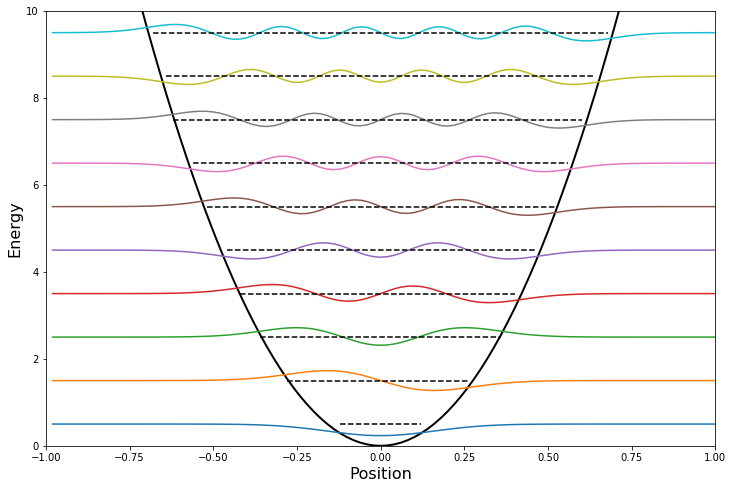

In [160]:
evals, evecs, x = eigensolver(U1, N=[100], domain=[[-1,1]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U1(x),'k-',lw=2)
for n in range(10):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1.5)
    mask = np.where(Y>U1(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')
ylim([0,10])
xlim([-1,1])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

## Moorse Potential

In [161]:
D = 5.0
b = 0.5
U2 = lambda x: D*(1-np.exp(-b*x))**2

[ 0.12503146  0.37034495  0.60932586  0.8419742   1.06828996]


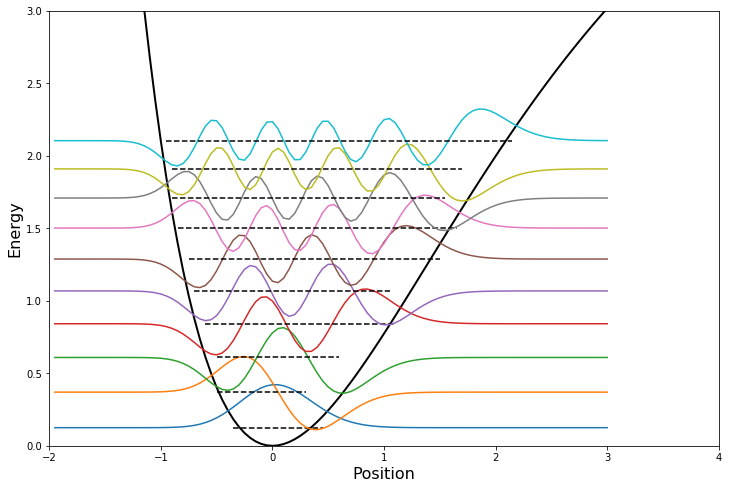

In [162]:
evals, evecs, x = eigensolver(U2,N=[100],domain=[[-2,3]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U2(x),'k-',lw=2)
for n in range(10):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1.5)
    mask = np.where(Y>U2(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')
ylim([0,3])
xlim([-2,4])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

## Cos(x) potential

In [163]:
U3 = lambda x: np.cos(x)+1

[ 0.07877778  0.2346999   0.38729967  0.53645947  0.68204667]


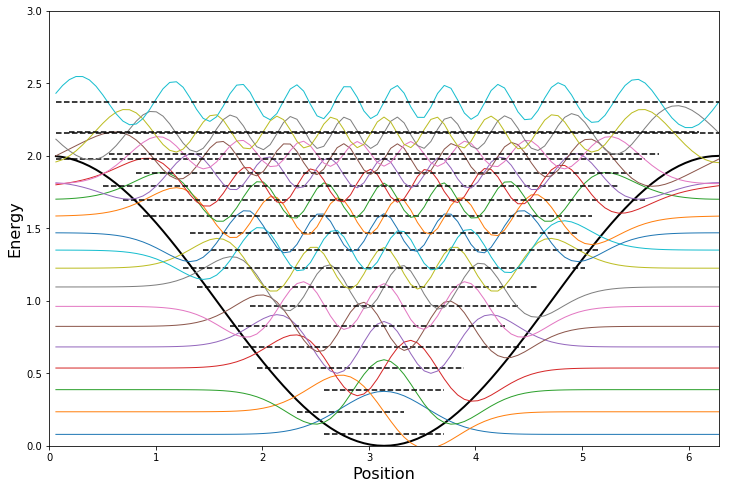

In [164]:
evals, evecs, x = eigensolver(U3,N=[100],domain=[[0,2*np.pi]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U3(x),'k-',lw=2)
for n in range(20):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1)
    mask = np.where(Y>U3(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')
xlim([0,2*np.pi]); ylim([0,3])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

## Double Well

In [165]:
a = 0
b = 3
U4 = lambda x: 1/b**4*((x-a/2)**2-b**2)**2

[ 0.07430716  0.07430716  0.21991958  0.21991959  0.3606945 ]


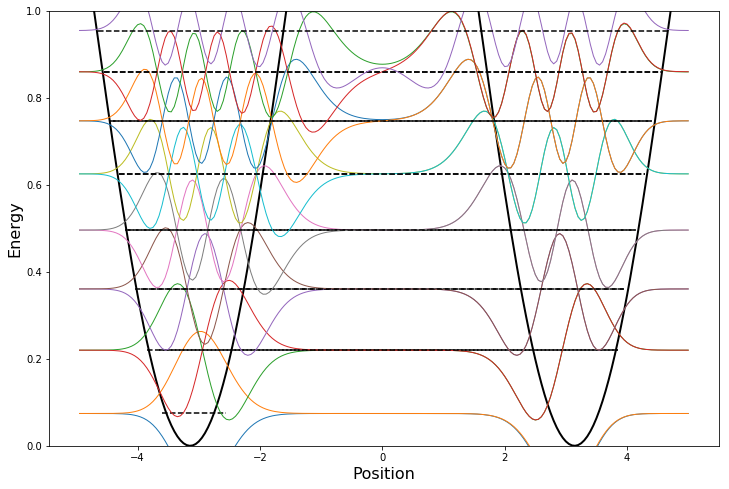

In [166]:
evals, evecs, x = eigensolver(U4, N=[200], domain=[[-5,5]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U3(x),'k-',lw=2)
for n in range(15):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1)
    mask = np.where(Y>U3(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')

ylim([0,1])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

## 2D Flux Qubit Potential

In [167]:
Ec=1/80.
Ej=1
alpha = 0.8
gamma = 0.02
f = 0.5
k00 = -2 / (1 + gamma) * Ec / Ej
k11 = -2 / (1 + 2 * alpha + gamma) * Ec / Ej
k_diag=[k00,k11]
U5 = lambda x,y: 2+alpha-2*np.cos(x)*np.cos(y)-alpha*np.cos(2*np.pi*f+2*y)

In [168]:
evals,evecs,pnts = eigensolver(U5,N=[30,30],
                               domain=[[-np.pi,np.pi],[-np.pi,np.pi]],k_diag=k_diag)
evals[:5]

array([ 1.58760757,  1.58761207,  1.58923317,  1.58923797,  1.73286323])

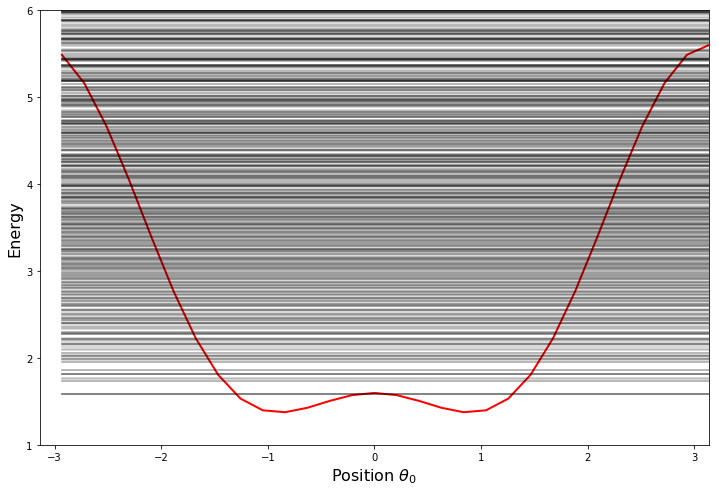

In [169]:
y=pnts[1]
Ux = U5(0,y)
fig = figure(figsize=(12,8))
plot(y,Ux,'r',lw=2)
for val in evals:
    plot(y,val*np.ones_like(y),'k',alpha=0.2)
ylim([1,6])
ylabel('Energy',fontsize=16)
xlabel('Position $\\theta_{0}$',fontsize=16)
xlim([-np.pi,np.pi])
show()

In [170]:
steps = 50
fvec = np.linspace(0.45,0.55,steps)
vals = np.zeros((20,steps))
for idx, f in enumerate(fvec):
    U6 = lambda x,y: 2+alpha-2*np.cos(x)*np.cos(y)-alpha*np.cos(2*np.pi*f+2*y)
    evals = eigensolver(U5,N=[20,20],domain=[[-np.pi,np.pi],[-np.pi,np.pi]],k_diag=k_diag,vals_only=True)
    vals[:,idx] = evals[:20]

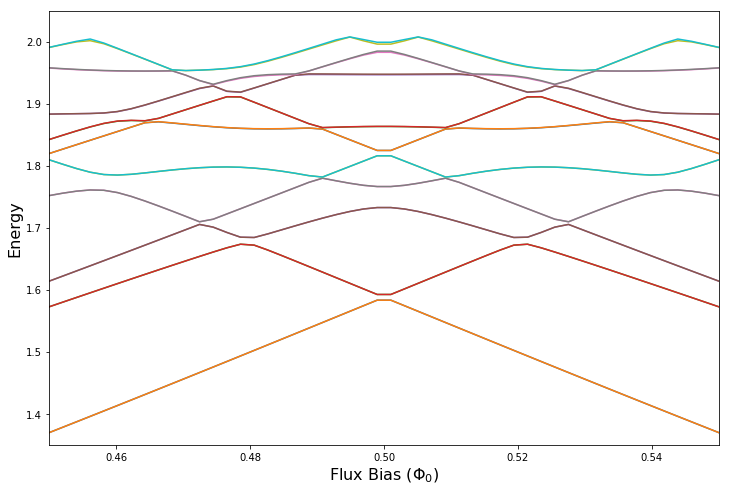

In [171]:
fig = figure(figsize=(12,8))
for i in range(20):
    plot(fvec,vals[i,:])
ylim([1.35,2.05])
xlim([0.45,0.55])
ylabel('Energy', fontsize=16)
xlabel('Flux Bias ($\Phi_{0}$)',fontsize=16)
show()

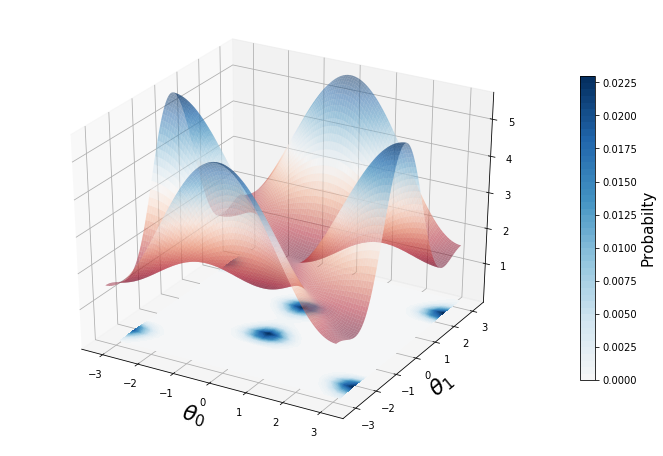

In [172]:
from mpl_toolkits.mplot3d import Axes3D

U7 = lambda x,y: 2+alpha-2*np.cos(x)*np.cos(y)-alpha*np.cos(2*np.pi*0.5+2*y)
evals, evecs, pnts = eigensolver(U7,N=[30,30],domain=[[-np.pi,np.pi],
                                [-np.pi,np.pi]],k_diag=k_diag)
x = np.linspace(-np.pi,np.pi,100)
[xx,yy] = np.meshgrid(x,x)
V = U7(xx,yy)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,V,rstride=1, cstride=1,linewidth=0,cmap=cm.RdBu,alpha=0.5)
[X,Y] = np.meshgrid(*pnts)
Z = np.abs(evecs[:,0].reshape((30,30)).T)**2
cf= ax.contourf(X,Y,Z,50,cmap=cm.RdBu,vmin=-Z.max(), vmax=Z.max())
cbar=colorbar(cf,shrink=0.7)
cbar.set_label(label='Probabilty',size=15)
xlabel('$\\theta_{0}$',fontsize=22)
ylabel('$\\theta_{1}$',fontsize=22)
show()

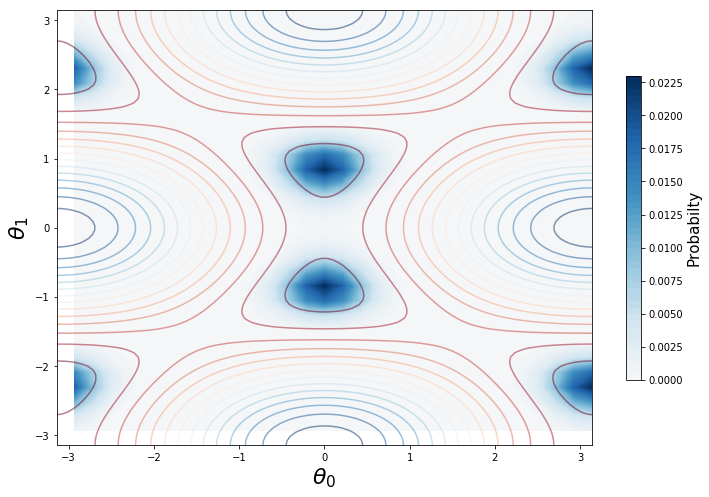

In [173]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.contour(xx,yy,V,15,cmap=cm.RdBu,alpha=0.5)
[X,Y] = np.meshgrid(*pnts)
Z = np.abs(evecs[:,0].reshape((30,30)).T)**2
cf= ax.contourf(X,Y,Z,50,cmap=cm.RdBu,vmin=-Z.max(), vmax=Z.max())
cbar=colorbar(cf,shrink=0.7)
cbar.set_label(label='Probabilty',size=15)
xlabel('$\\theta_{0}$',fontsize=22)
ylabel('$\\theta_{1}$',fontsize=22)
show()

## JPM Potential

In [264]:
phi0 = h/(2*e)

Lg=1.24e-9
Cs=3.27e-12
I0=1.2e-6
N=1001


Lg = Lg
Cs = Cs
I0 = I0
Ej = phi0 * I0/(2*pi) 
Lj = phi0/(2 * pi * I0)

mm = Cs * (phi0/(2*pi))**2

k = -hbar**2 / (2*mm)

betaL = Lg/Lj

dx = 0.9
dxc = 6.174

Ujpm = lambda d: (1/(2*betaL)*(d - dx*dxc)**2 - np.cos(d))

evals, evecs, d = eigensolver(Ujpm,N=[N],domain=[[0,3*np.pi]], k_diag=[k/Ej])


## Plot 
u = Ujpm(d)

d_max = optimize.fmin(lambda x: -1*Ujpm(x), [0.8*pi], disp=0)[0]
d_min = optimize.fminbound(Ujpm, d[0], d_max, disp=0)
d_min2 = optimize.fminbound(Ujpm, d_max, d[-1], disp=0)

u_min2 = Ujpm(d_min2)
u_max = Ujpm(d_max)  
u_min = Ujpm(d_min)

dU = u_max - u_min
dd = d_max - d_min  

print("Potential Maximum of {:f} at {:f}".format(u_max, d_max/pi))
print("Potential Minimum of {:f} at {:f}".format(u_min, d_min/pi))
print("Potential Minimum of {:f} at {:f}".format(u_min2, d_min2/pi)) 
print("Barrier: dU = %f Ej" % (dU))

l, tr = LinePlot(x=d/pi, y=u, show=False, title="Potential");
tr.update(name="U")
trs = [tr]
trs.append(go.Scatter(x=np.array([d_min, d_max, d_min2])/pi, 
                        y=np.array([u_min, u_max, u_min2]),
                        mode='markers'))

iplot(go.Figure(data=trs, layout=l))

Potential Maximum of 1.839802 at 0.749512
Potential Minimum of 1.735696 at 0.399988
Potential Minimum of -0.952205 at 1.958012
Barrier: dU = 0.104106 Ej


In [265]:
np.shape(evecs)

(1001, 1001)

In [274]:
nbound = 0
boundidx = []

for i in range(0,N):
    if evals[i] >= u_min and evals[i] <= u_max:
        if np.inner(evecs[:,i] * (d_min-2*dd < d) * (d < d_max), evecs[:,i]) > 0.5:
            nbound = nbound + 1
            boundidx.append(i)


Evecs = [evecs[:,i] for i in boundidx]
Es = evals[boundidx]

NN = nbound
print("Found {} bound states.".format(NN)) 

trs = []

l, tr = LinePlot(x=d/pi, y=u, show=False);tr.update(name="U")

trs.append(tr)
for n in range(NN):
#     y = Evecs[i] + Es[i]/Ej
    Y=0.01*Evecs[n]+Es[n]
    l, tr = LinePlot(x=d/pi, y=Y, show=False)
    tr.update(name=str(n))
    trs.append(tr)

trs.append(go.Scatter(x=np.array([d_min, d_max, d_min2])/pi, 
                        y=np.array([u_min, u_max, u_min2]),
                        mode='markers'))

l.update(yaxis = {'range': [0.99*u_min, 1.01*u_max], 'title': 'U/Ej'},
         xaxis = {'title': 'delta'},
                  showlegend=False)
iplot(go.Figure(data=trs, layout=l))

Found 18 bound states.


In [275]:
evecs.T

array([[  3.34734318e-22,   9.86501569e-18,   5.28441745e-18, ...,
          1.51788304e-17,  -3.46944695e-18,   6.93889390e-18],
       [  0.00000000e+00,   1.48535698e-17,   1.47603965e-17, ...,
          4.81385765e-17,   1.95156391e-17,   1.10588622e-17],
       [  0.00000000e+00,  -8.13151629e-20,  -5.95488584e-18, ...,
         -6.72205347e-18,  -4.11996826e-18,  -1.40946282e-18],
       ..., 
       [ -8.29179455e-02,   9.47864430e-02,  -1.05557689e-01, ...,
         -2.94626239e-02,   5.34739824e-02,  -7.32236901e-02],
       [ -1.45979619e-01,   1.36026689e-01,  -1.27867817e-01, ...,
         -1.67403324e-01,   1.69875059e-01,  -1.65389077e-01],
       [  1.45880674e-01,  -1.30546879e-01,   1.18214765e-01, ...,
          1.97209472e-01,  -1.86915420e-01,   1.72350932e-01]])